In [1]:
import os #allows you to interface with underlying os system 
import urllib #allows you to work with URLs
import pandas as pd #data structures and data analysis 
import numpy as np #multi dimensional arrays and matrices, big math 
import geopandas as gpd # works with geospatial data (geometrys)
import matplotlib.pylab as plt #publication plotting for python 
%matplotlib inline 
import json #reading json files
import io
import requests
import shapely
from fiona.crs import from_epsg
import pysal as ps

In [2]:
urllib.request.urlretrieve("https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile", 'file.gz')

!unzip -u file.gz -d $PUIDATA

stringall = !zipinfo -1 file.gz
string = os.getenv("PUIDATA")+ "/"+stringall[1] # [1] 4 files in the zip, remember index starts at 0 

pumashp = gpd.GeoDataFrame.from_file(string)

#cleanupdata
for i in stringall: #This removes the path from the $PUIdata folder but it is still "there"
    delPath = os.getenv("PUIDATA")+ "/"+ i
    os.system('rm ' + delPath)

Archive:  file.gz
  inflating: /nfshome/mbh329/PUIdata/geo_export_d66333d3-0420-44ab-bb79-28e00f84a194.dbf  
  inflating: /nfshome/mbh329/PUIdata/geo_export_d66333d3-0420-44ab-bb79-28e00f84a194.shp  
  inflating: /nfshome/mbh329/PUIdata/geo_export_d66333d3-0420-44ab-bb79-28e00f84a194.shx  
  inflating: /nfshome/mbh329/PUIdata/geo_export_d66333d3-0420-44ab-bb79-28e00f84a194.prj  


In [3]:
!ls $PUIDATA #unsure why this lists this and not data in puidata folder 

201808-citibike-tripdata.csv
201808-citibike-tripdata.csv.zip
ACS_16_1YR_GCT2801.ST50_metadata.csv
ACS_16_1YR_GCT2801.ST50.txt
ACS_16_1YR_GCT2801.ST50_with_ann.csv
ACS_16_1YR_GCT2801.ST50.zip
aff_download_readme_ann.txt
busdata.txt
citibikecsv_05_16
citibikecsv_05_16.zip
citibikecsv_06_16
citibikecsv_06_16.zip
geo_export_39b38f3a-92c8-4b9a-85fb-834057452b35.dbf
geo_export_39b38f3a-92c8-4b9a-85fb-834057452b35.prj
geo_export_39b38f3a-92c8-4b9a-85fb-834057452b35.shp
geo_export_39b38f3a-92c8-4b9a-85fb-834057452b35.shx
geo_export_4aa52bb9-9a40-4d4a-979d-bcdcbc146e69.dbf
geo_export_4aa52bb9-9a40-4d4a-979d-bcdcbc146e69.prj
geo_export_4aa52bb9-9a40-4d4a-979d-bcdcbc146e69.shp
geo_export_4aa52bb9-9a40-4d4a-979d-bcdcbc146e69.shx
geo_export_7977d278-c976-48c7-bcb3-34edfce91307.dbf
geo_export_7977d278-c976-48c7-bcb3-34edfce91307.prj
geo_export_7977d278-c976-48c7-bcb3-34edfce91307.shp
geo_export_7977d278-c976-48c7-bcb3-34edfce91307.shx
geo_export_7ec44b98-3237-43b1-815c-71e39d2dd155.dbf
geo_export_7

In [4]:
pumashp.head(10)

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...
5,4016,1.207135e+08,109477.751817,POLYGON ((-73.94405560932151 40.61199284173428...
6,3705,1.224951e+08,68657.316149,POLYGON ((-73.87359713633828 40.83979855593596...
7,3706,4.388687e+07,51799.404183,"POLYGON ((-73.88785196328796 40.8721141761279,..."
8,3707,4.228113e+07,37347.925798,"POLYGON ((-73.89735765412577 40.8587627349268,..."
9,4006,6.184965e+07,42555.996557,POLYGON ((-73.95526963654763 40.67012490485409...


In [5]:
pumashp.crs


{'init': 'epsg:4326'}

Text(0.5,0.01,'Figure 1.2: This is a base map of PUMA districts in NYC')

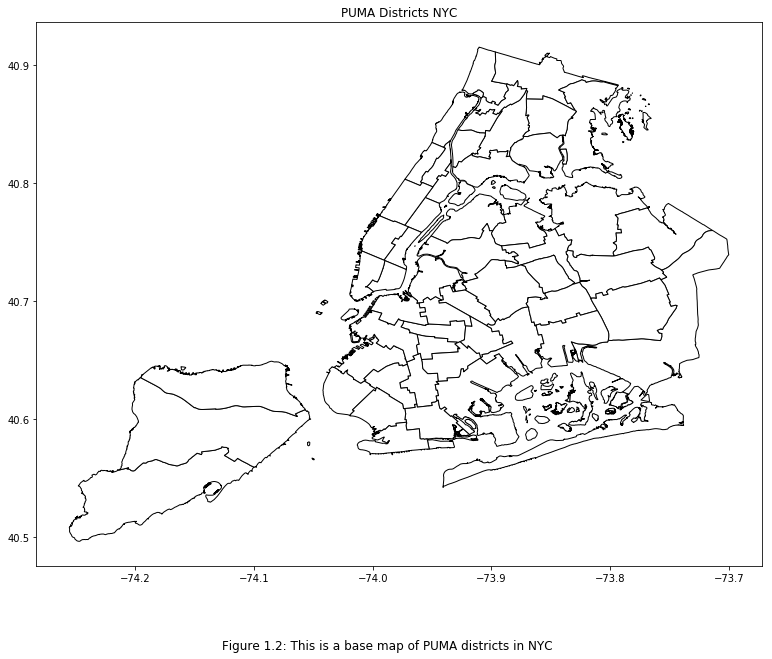

In [6]:
fig, ax = plt.subplots(figsize=(13,10))
ax.get_xaxis().set_visible(True) #takes away axis from the map x,y axis relates to Lat, Long 
ax.get_yaxis().set_visible(True) #latitude
pumashp.plot(color="white", edgecolor="black", lw=1, ax=ax)
plt.title("PUMA Districts NYC");

txt = "Figure 1.2: This is a base map of PUMA districts in NYC"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)


# Assignment 2

In [7]:
#reading in my api key saved in censusAPI.py as #this is fb55 code, not sure what it means
#myAPI = 'XXXXXXXXXXXXXXX'
# from censusAPI import myAPI

In [8]:
url = 'https://api.census.gov/data/2016/acs/acs1/variables.json'
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [9]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))
#Python2
#affkeys = np.array(aff1y['variables'].keys())

You need two features: total number of households, and number of households with broadband access

Broadband access is one of the B28002 keys. However there are many of those! Each variable has several observations associated to it: B28002 is all internet access data (broadband, dial up, none, ...), and for each of those you have the estimate (count, mean, median, percentage...), the margin of errors, and annotations. Those are identified by an appendix that begins with "_". Look carefully at the line of code below and its output. I am creating a list that contains the keys of the dictionary I created from the json file for all B28002 observations (rows that start with "B28002") that include the word "Broadband" in the description.

The syntax is a lost comprehension:

    as = \[a for a in listOfAs\] 

is simply a compact way to write

    as = \[\]
    for a in listOfAs:
        as.append(a)

In [10]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type')]

In [11]:
#keyword for the number of households
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [12]:
#keyword for the number of households with broarband access
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [13]:
url =  "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36" + "&key=myAPI"
#get = keyNBB, 

In [14]:
url

'https://api.census.gov/data/2016/acs/acs1?get=B28002_004E,NAME&for=public%20use%20microdata%20area:*&in=state:36&key=0b927fd170e2c9ee3c56894f2054c8f74fb5a47f'

In [15]:
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN
5,32221,"Otsego, Schoharie, Oneida (South) & Herkimer (...",36,403,NaN
6,41386,"Jefferson & Lewis Counties PUMA, New York",36,500,NaN
7,37692,"Oswego County PUMA, New York",36,600,NaN
8,37719,"Onondaga County (Central)--Syracuse City PUMA,...",36,701,NaN
9,40309,"Onondaga County (North) PUMA, New York",36,702,NaN


In [16]:
url = url =  "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36" + "&key= myAPI"
#get = keyNBB, "

resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))


In [17]:
pumaPP.head(5)

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [18]:
pumaBB.drop("Unnamed: 4", axis=1, inplace= True) #axis 1 is columns
pumaPP.drop("Unnamed: 4", axis=1, inplace= True)

#dropping the unnamed:4 column from the dataframe

In [19]:
pumaBB = pumaBB.merge(pumaPP) 

#merging dataframes BB + PP into pumaBB as instructed by fb55

In [20]:
pumaBB['pcBB'] = pumaBB.B28002_004E/pumaBB.B28002_001E * 100

#formula for percentages of households w/ broadband 
# B28002_004/B28002_001 = # of houses with broadband total 

In [21]:
pumaBB.head(5)

,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,32607,"St. Lawrence County PUMA, New York",36,100,40479,80.552879
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,67092,75.733321
2,41210,"Warren & Washington Counties PUMA, New York",36,300,51614,79.842678
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,44300,81.433409
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,61146,78.150656


In [22]:
file = os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50.zip"
os.system('unzip ' + file + ' -d $PUIDATA')
#os.system("unzip " + PUIdata + "/ACS_16_1YR_GCT2801.ST50.zip -d " + PUIdata)

256

In [23]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"],skiprows=[1,2]) 

bbpc.head(5)

,GCT_STUB.target-geo-id2,HC01,HC02
0,100100,70.9,2.5
1,100200,80.5,2.7
2,100301,87.0,2.8
3,100302,81.9,2.9
4,100400,69.2,3.6


In [24]:
bbpc.rename(columns={"GCT_STUB.target-geo-id2": "gid"}, inplace=True) #renaming columns \
# important 

In [25]:
bbpc.head(5)

,gid,HC01,HC02
0,100100,70.9,2.5
1,100200,80.5,2.7
2,100301,87.0,2.8
3,100302,81.9,2.9
4,100400,69.2,3.6


In [26]:


#df = DataFrame(np.arange(10).reshape(5,2),columns=list('AB'))
#bbpc.gid = bbpc.gid.astype()
#bbpc.HC01 = bbpc.HC01.astype(np.int64)
#bbpc.HC02 = bbpc.HC02.astype(np.int64)
# df.column_name = df.column_name.astype(np.int64)



#bbpc.gid.astype(int, copy=True, errors='coerce')
#bbpc.HC01.astype(int, copy=True, errors='coerce') 
#bbpc.HC02.astype(int, copy=True, errors='coerce')
#bbpc.head(5)

In [27]:
bbpc["gid"] = bbpc.gid - 3600000
bbpc.head(5)

,gid,HC01,HC02
0,-3499900,70.9,2.5
1,-3499800,80.5,2.7
2,-3499699,87.0,2.8
3,-3499698,81.9,2.9
4,-3499600,69.2,3.6


In [28]:
diff_ = pumaBB.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["pcBB", "HC01"]]

diff_["diff"] = np.abs(diff_["pcBB"] - diff_["HC01"].astype(float))

diff_.describe()

,pcBB,HC01,diff
count,145.000000,145.000000,145.000000
mean,81.845478,81.843448,0.026217
std,7.063369,7.065358,0.014480
min,54.932945,54.900000,0.000178
25%,77.770257,77.800000,0.012252
50%,82.826141,82.800000,0.027230
75%,87.305077,87.300000,0.039090
max,93.404143,93.400000,0.049872


# Assignment 3 

In [29]:
pumashp.dtypes
pumashp['puma'] = pumashp.puma.astype(int)

In [30]:
pumashp.dtypes #dtypes tells you what the df is (str, int)

puma            int64
shape_area    float64
shape_leng    float64
geometry       object
dtype: object

In [31]:
pumashp = pumashp.merge(pumaBB, right_on="public use microdata area", 
                     left_on="puma")

In [32]:
pumashp.head(1)

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,42158,84.27582


Text(0.5,0.01,'Figure 3.1: This figure shows the percentage of broadband users by PUMA region in NYC')

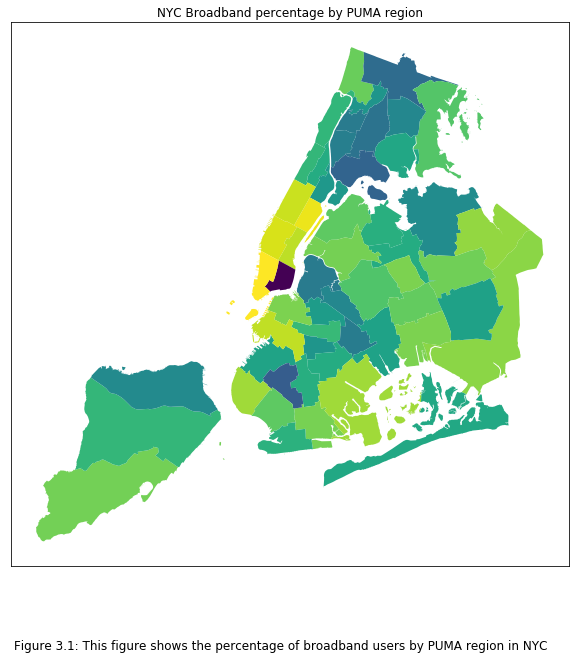

In [33]:
#cp.choroplethNYC = pumashp

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
pumashp.plot(column='pcBB',cmap='viridis',alpha=1,linewidth=0.1,ax=ax)
plt.title("NYC Broadband percentage by PUMA region");

txt = "Figure 3.1: This figure shows the percentage of broadband users by PUMA region in NYC"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

# Assignment 4


In [34]:
linknyc_pointloc = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW7_fb55/linkNYClocations.csv")

### YOU MUST USE RAW github url NOT regular github url 

In [35]:
linknyc_pointloc.head()


,Unnamed: 0,link_site,longitude,date_link_,latitude
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [36]:
# combine lat and lon to one column
linknyc_pointloc['lonlat']=list(zip(linknyc_pointloc.longitude,linknyc_pointloc.latitude))

# Create Point Geometry for based on lonlat column
linknyc_pointloc['geometry']=linknyc_pointloc[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

linknyc_pointloc.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude,lonlat,geometry
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753)
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938)
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439)
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042)
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133)


In [37]:
 
linknyc_pointloc = gpd.GeoDataFrame(linknyc_pointloc)
#needed to add gpd. to define geodataframe

In [38]:
linknyc_pointloc.crs = from_epsg(4326)
linknyc_pointloc.crs

{'init': 'epsg:4326', 'no_defs': True}

Text(0.5,0.01,'Figure 4.1: This map shows the percentage of broadband users by NYC PUMA region withan overlayed geodataframe of LINKNYC locations with a variance based on their installation date')

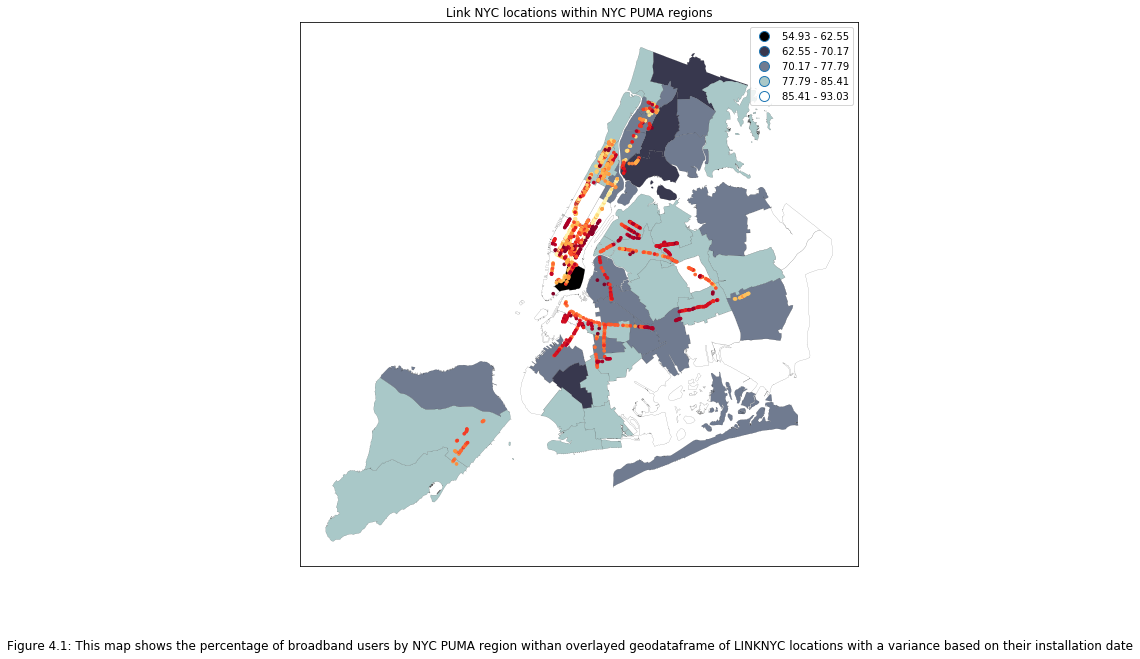

In [39]:
f, ax = plt.subplots(figsize=(10,10)) #size of your plot (matplotlib, not gpd)
ax.get_xaxis().set_visible(False) # sets if the axis' will be visible 
ax.get_yaxis().set_visible(False)

pumashp.plot(column='pcBB',cmap='bone',alpha=1,linewidth=0.1, ax=ax, scheme='Equal_interval',\
             edgecolor='black', legend=True, k=5) 

#column is the data you are mapping
#cmap is the mapping schema you will use, if you just use color= no variance in color
#ax=ax IS VERY IMPORTANT WHEN YOU ARE plotting, make sure to set both plots to ax
#scheme= codes the data into quantities(Q1,Q2)

linknyc_pointloc.plot(column='date_link_', cmap='YlOrRd', markersize=7, ax=ax)
plt.title("Link NYC locations within NYC PUMA regions");
                      
txt = "Figure 4.1: This map shows the percentage of broadband users by NYC PUMA region with\
an overlayed geodataframe of LINKNYC locations with a variance based on their installation date"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
#cmap='viridis',alpha=1,
                  #linewidth=0.1,ax=ax, scheme="quantiles", legend=True, k=10

# Assignment 5

In [40]:
acspopulation = 'B00001_001E' #defining what key we want to use 
url = "https://api.census.gov/data/2016/acs/acs1?get=" + acspopulation +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36" + "&key=myAPI"


In [41]:
resp = requests.request('GET', url).content
puma_pop = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [42]:
puma_pop.head()

,B00001_001E,NAME,state,public use microdata area,Unnamed: 4
0,3075,"St. Lawrence County PUMA, New York",36,100,NaN
1,4356,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,2736,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,2722,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,2874,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [43]:
puma_pop.drop("Unnamed: 4", axis=1, inplace= True)

In [44]:
puma_pop.head()

,B00001_001E,NAME,state,public use microdata area
0,3075,"St. Lawrence County PUMA, New York",36,100
1,4356,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200
2,2736,"Warren & Washington Counties PUMA, New York",36,300
3,2722,Herkimer (North & Central) & Oneida (Outer) Co...,36,401
4,2874,Oneida County (Central)--Greater Utica & Rome ...,36,402


In [45]:
puma_pop.rename(columns={"public use microdata area": "PUMA"}, inplace=True)

In [46]:
puma_pop.head()

,B00001_001E,NAME,state,PUMA
0,3075,"St. Lawrence County PUMA, New York",36,100
1,4356,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200
2,2736,"Warren & Washington Counties PUMA, New York",36,300
3,2722,Herkimer (North & Central) & Oneida (Outer) Co...,36,401
4,2874,Oneida County (Central)--Greater Utica & Rome ...,36,402


In [47]:
linknyc_pointloc = linknyc_pointloc.to_crs(epsg=2263)
pumashp = pumashp.to_crs(epsg=2263)

#creating new datafram (ex. linknyc_pointloc_fin FROM linknyc_pointloc(alredy defined))\
#epsg 


In [48]:
linknyc_pointloc = gpd.GeoDataFrame(linknyc_pointloc)
pumashp = gpd.GeoDataFrame(pumashp)


In [49]:
linkpp = gpd.sjoin(linknyc_pointloc, pumashp)

In [50]:
linkpp

,Unnamed: 0,link_site,longitude,date_link_,latitude,lonlat,geometry,index_right,puma,shape_area,shape_leng,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (1000196.411360609 194918.1045344363),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (1000284.976955119 194872.4991186759),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (1000265.48686938 195013.900946364),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (1000076.658138533 196154.157733508),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (997155.0239397929 204558.4761382252),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
5,5,bk-01-140988,-73.957869,2017-11-03,40.717770,"(-73.95786908, 40.71777024)",POINT (995928.9820669403 200782.3819014875),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
798,798,bk-01-143275,-73.951496,2017-03-11,40.725456,"(-73.951496, 40.725456)",POINT (997694.0932067811 203583.4543365685),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
805,805,bk-01-108949,-73.942908,2017-03-06,40.701419,"(-73.942908, 40.701419)",POINT (1000080.178956744 194827.4815936084),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
848,848,bk-01-125630,-73.942682,2017-05-06,40.703654,"(-73.942682, 40.703654)",POINT (1000142.310266003 195641.7995747893),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616
914,914,bk-01-126669,-73.942563,2017-04-28,40.702936,"(-73.942563, 40.702936)",POINT (1000175.476391226 195380.2323792208),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,36,4001,66037,70.631616


In [51]:
linkpp = gpd.sjoin(pumashp, linknyc_pointloc).groupby('puma')[['link_site']].count()

In [53]:
pumashplc = pd.merge(pumashp, linkpp, how='left', left_on='puma', right_index=True)

#this is very confusing ASK ??????????????


In [54]:
pumashplc.head(5)

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB,link_site
index_left,,,,,,,,,,,
0,3701,9.792852e+07,53227.144461,"POLYGON ((1012885.033996583 268830.4841918442,...",35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,42158,84.275820,1.0
1,3702,1.889860e+08,106050.002302,"POLYGON ((1027331.841796877 256069.2766112776,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,49817,68.310015,NaN
2,3703,2.670137e+08,304071.257466,(POLYGON ((1042822.450195312 243439.8142089319...,36716,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,44329,82.826141,NaN
3,3704,1.062129e+08,47970.901277,"POLYGON ((1026308.769592285 256767.6972045382,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,44476,72.553737,NaN
4,4015,8.105438e+07,50007.415493,"POLYGON ((997086.4570312516 171933.9880370507,...",44079,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,55953,78.778618,3.0


In [55]:
pumashplc["linkNYCp100p"] = pumashplc.link_site/pumashplc.B28002_001E * 100
pumashplc = pumashplc.fillna(0)
pumashplc["linkNYCp100p"].describe()

count    55.000000
mean      0.040580
std       0.056277
min       0.000000
25%       0.000000
50%       0.022317
75%       0.062916
max       0.282049
Name: linkNYCp100p, dtype: float64

In [56]:
pumashplc

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB,link_site,linkNYCp100p
index_left,,,,,,,,,,,,
0,3701,9.792852e+07,53227.144461,"POLYGON ((1012885.033996583 268830.4841918442,...",35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,42158,84.275820,1.0,0.002372
1,3702,1.889860e+08,106050.002302,"POLYGON ((1027331.841796877 256069.2766112776,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,49817,68.310015,0.0,0.000000
2,3703,2.670137e+08,304071.257466,(POLYGON ((1042822.450195312 243439.8142089319...,36716,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,44329,82.826141,0.0,0.000000
3,3704,1.062129e+08,47970.901277,"POLYGON ((1026308.769592285 256767.6972045382,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,44476,72.553737,0.0,0.000000
4,4015,8.105438e+07,50007.415493,"POLYGON ((997086.4570312516 171933.9880370507,...",44079,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,55953,78.778618,3.0,0.005362
5,4016,1.207135e+08,109477.751817,"POLYGON ((999782.7833862281 162246.8424071733,...",49702,NYC-Brooklyn Community District 15--Sheepshead...,36,4016,58343,85.189311,0.0,0.000000
6,3705,1.224951e+08,68657.316149,"POLYGON ((1019225.58178711 245263.8524169383, ...",40757,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,3705,58706,69.425612,1.0,0.001703
7,3706,4.388687e+07,51799.404183,"POLYGON ((1015266.210021974 257032.2927855904,...",34391,"NYC-Bronx Community District 7--Bedford Park, ...",36,3706,46018,74.733800,20.0,0.043461
8,3707,4.228113e+07,37347.925798,"POLYGON ((1012642.970825195 252164.6224364594,...",32926,NYC-Bronx Community District 5--Morris Heights...,36,3707,46654,70.574870,29.0,0.062160


Text(0.5,0.01,'Figure 5.0:linkNYC locations overlayed on top of a choropleth of the number of LINKNYC stations per 100 people')

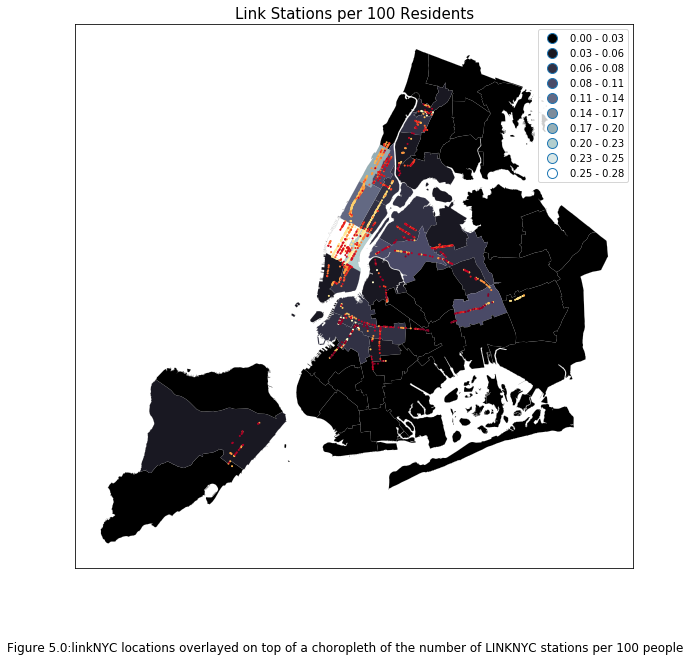

In [62]:
f, ax = plt.subplots(figsize=(10,10))

pumashplc.plot(column='linkNYCp100p', cmap='bone', edgecolor='grey', scheme="Equal_interval",k=10 ,lw=.1, legend=True, ax=ax)
#base map 

linknyc_pointloc.plot(cmap='YlOrRd', markersize=1, ax=ax, legend=True)
#point data of linknyc stations

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax.set_title('Link Stations per 100 Residents', fontsize=15)


txt = "Figure 5.0:linkNYC locations overlayed on top of a choropleth of the number of LINKNYC stations per 100 people"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
